#### **@Author : Rupesh Kumar**

#### **Date : 25/10/2023**

<p style="background-color:#ff5277;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:10px 10px;"> PART 2</p>

##### Building on our previous examination in Part 1, where we went through the stages spanning from the initial app launch to the user's ride request within the 'Pre-order phase.

<a id="1"></a>
<p style="background-color:#ff5277;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:10px 10px;"> Business Understanding</p>

##### We will focus on assessing app functionality, identifying areas of improvement & present our recommendations. To do that we will first explore the data and conduct a through study via visually analysis and share recommendations. 


<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#ff5277;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">TABLE OF CONTENTS</p>   
    

- [1. BUSINESS UNDERSTANDING](#1)

- [2. DATA UNDERSTANDING](#2)

    - [2.1 Get information on the data](#2.1)
    - [2.2 Conducting summary statistics](#2.2)
    - [2.3 Investigating all elements within each feature](#2.3)
    - [2.4 Creating time based features](#2.4)
    

- [3. DATA VISUALIZATION](#3)
    - [3.1 Weekly event distribution study](#3.1)
    - [3.2 Event distribution study](#3.2)
    - [3.3 Preorder funnel](#3.3)
    - [3.4 Hourly funnel](#3.4)
    - [3.5 Minute-level funnel](#3.5)
    - [3.6 Weekly event funnel](#3.6)
    - [3.7 Coorelation study for traffic analysis](#3.7)

- [4. CONCLUSION](#4)




In [39]:
# Importing Packages
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
from IPython.display import Image, display, HTML
import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)

In [40]:
## Data Load
df = pd.read_csv("/Users/rupesh/Desktop/COD/Heetch/data/mobile_events.csv")

In [41]:
df

device_id             event_name            timestamp
0              1           pickup_shown  2020-10-02 15:36:02
1              1          dropoff_shown  2020-10-02 15:36:05
2              1       pickup_confirmed  2020-10-02 15:36:05
3              1  dropoff_address_typed  2020-10-02 15:36:06
4              1          dropoff_shown  2020-10-02 15:36:10
...          ...                    ...                  ...
65529        865           pickup_shown  2020-10-03 09:26:51
65530        865           pickup_shown  2020-10-03 10:07:21
65531        865           pickup_shown  2020-10-03 10:41:08
65532        865   pickup_address_typed  2020-10-03 10:41:09
65533        865           pickup_shown  2020-10-03 10:41:47

[65534 rows x 3 columns]

<a id="2"></a>
<p style="background-color:#ff5277;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:10px 10px;"> Data Understanding</p>

#### **The dataset consists of 65534 Rows & 3 Columns which are as follows :**

- device_id– (A unique id to identity the customer device)
- event_name - (Different steps the user goes through when interacting with the app)
- timestamp – (Time of the events)

## <b>2.1 <span style='color:#ff5277'> Get information on the data</span></b>

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65534 entries, 0 to 65533
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   device_id   65534 non-null  int64 
 1   event_name  65534 non-null  object
 2   timestamp   65534 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.5+ MB


<a id="2.2"></a>
## <b>2.2 <span style='color:#ff5277'> Conducting summary statistics</span></b>

In [43]:
# LOOKING TO CONFIRM IF WE HAVE ANY NULL VALUES IN THE DATA
df.isnull().sum()

device_id     0
event_name    0
timestamp     0
dtype: int64

<a id="2.3"></a>
## <b>2.3 <span style='color:#ff5277'> Investigating all elements within each feature</span></b>

In [44]:
for colum in df:
    unique_values = np.unique(df[colum])
    nr_values = len(unique_values)
    if nr_values < 22:
        print("The number of unique values for features {} : {} --- {}".format(colum, nr_values,unique_values))
    else:
         print("The number of unique values for features {} : {}".format(colum, nr_values))

The number of unique values for features device_id : 865
The number of unique values for features event_name : 9 --- ['dropoff_address_typed' 'dropoff_confirmed' 'dropoff_shown'
 'payments_selected' 'payments_shown' 'pickup_address_typed'
 'pickup_confirmed' 'pickup_shown' 'ride_order_tapped']
The number of unique values for features timestamp : 51337


<a id="2.4"></a>
## <b>2.4 <span style='color:#ff5277'> Creating time based features</span></b>

In [45]:
# Convert 'timestamp' to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Extract the day and create a new 'Day' column in 'YYYY-MM-DD' format
df['Day'] = df['timestamp'].dt.strftime('%Y-%m-%d')

# Extract the day of the week and the time of day
df['day_of_week'] = df['timestamp'].dt.day_name()

# Extract the time and create a new 'Time' column in 'h:m:s' format
df['Time'] = df['timestamp'].dt.strftime('%H:%M:%S')

In [46]:
df

device_id             event_name           timestamp         Day  \
0              1           pickup_shown 2020-10-02 15:36:02  2020-10-02   
1              1          dropoff_shown 2020-10-02 15:36:05  2020-10-02   
2              1       pickup_confirmed 2020-10-02 15:36:05  2020-10-02   
3              1  dropoff_address_typed 2020-10-02 15:36:06  2020-10-02   
4              1          dropoff_shown 2020-10-02 15:36:10  2020-10-02   
...          ...                    ...                 ...         ...   
65529        865           pickup_shown 2020-10-03 09:26:51  2020-10-03   
65530        865           pickup_shown 2020-10-03 10:07:21  2020-10-03   
65531        865           pickup_shown 2020-10-03 10:41:08  2020-10-03   
65532        865   pickup_address_typed 2020-10-03 10:41:09  2020-10-03   
65533        865           pickup_shown 2020-10-03 10:41:47  2020-10-03   

      day_of_week      Time  
0          Friday  15:36:02  
1          Friday  15:36:05  
2          Friday  15:36:05  
3          Friday  15:36:06  
4          Friday  15:36:10  
...           ...       ...  
65529    Saturday  09:26:51  
65530    Saturday  10:07:21  
65531    Saturday  10:41:08  
65532    Saturday  10:41:09  
65533    Saturday  10:41:47  

[65534 rows x 6 columns]

## <b>3.1 <span style='color:#ff5277'> Weekly event distribution study</span></b>

In [57]:
# Define a custom order for days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Count events by day of the week
day_of_week_counts = df['day_of_week'].value_counts()

# Sort the counts based on the custom day order
day_of_week_counts = day_of_week_counts.reindex(day_order)

# Create a bar plot to visualize the distribution
fig = px.bar(day_of_week_counts, x=day_of_week_counts.index, y=day_of_week_counts.values)
fig.update_layout(title='Event Distribution by Day of the Week', xaxis_title='Day of the Week', yaxis_title='Event Count')

# Add value and percentage annotations
total_events = day_of_week_counts.sum()
annotations = [f"{count} ({count/total_events*100:.2f}%)" for count in day_of_week_counts]

fig.update_traces(text=annotations, textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.update_layout(height=600, width=1500)

# Add a trend line
day_of_week_counts = day_of_week_counts.reset_index()
day_of_week_counts.columns = ['day_of_week', 'event_count']
day_of_week_counts['day_index'] = day_of_week_counts['day_of_week'].apply(lambda x: day_order.index(x))
X = sm.add_constant(day_of_week_counts['day_index'])
y = day_of_week_counts['event_count']

model = sm.OLS(y, X).fit()
trend_line = model.predict(X)

fig.add_scatter(x=day_order, y=trend_line, mode='lines', name='Trend Line')
fig.update_layout(height=600, width=1100)

fig.show()

#### <b><span style='color:#FF0000'> NOTE :</span></b>

**1)The highest number of events occurs on Friday accounting for 16% of the weekly events.**\
**2)Wednesday records the lowest number of events accounting for 12.06 % of the weekly events.**\
**3)A steadily increasing trend is noticeable from Wednesday to Friday.**\
**4)The trend line shows an upward trajectory from Monday to Saturday indicating a rise in event as the week progresses, with slight drop on Sunday.**

**In summary,our peak is on Friday and the dip is on Wednesday with general increasing trend from start to end of the week.**



## <b>3.2 <span style='color:#ff5277'> Event distribution study</span></b>

In [58]:
# Define the custom order for event names
custom_order = [
    "pickup_shown",
    "pickup_confirmed",
    "pickup_address_typed",
    "dropoff_shown",
    "dropoff_confirmed",
    "dropoff_address_typed",
    "payments_shown",
    "payments_selected",
    "ride_order_tapped"
]

# Example: Histogram of event counts using Plotly with custom order and larger size
fig = px.histogram(df, x='event_name', title='Event Name Distribution')

# Calculate event counts and percentages
event_counts = df['event_name'].value_counts()
total_count = event_counts.sum()
event_percentages = (event_counts / total_count) * 100

# Create custom labels for annotations
annotations = [f"{count} ({percent:.2f}%)" for count, percent in zip(event_counts, event_percentages)]

# Add annotations on top of the bars
fig.update_traces(text=annotations, textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')

# Set the custom order for the x-axis categories
fig.update_xaxes(title_text='Event Name', categoryorder='array', categoryarray=custom_order)
fig.update_yaxes(title_text='Count')

# Add a trend line
event_counts_df = pd.DataFrame({'event_name': custom_order, 'event_count': event_counts})
event_counts_df['event_index'] = event_counts_df['event_name'].apply(lambda x: custom_order.index(x))
X = sm.add_constant(event_counts_df['event_index'])
y = event_counts_df['event_count']

model = sm.OLS(y, X).fit()
trend_line = model.predict(X)

fig.add_scatter(x=custom_order, y=trend_line, mode='lines', name='Trend Line')

fig.update_layout(height=600, width=1100) 

fig.show()

#### <b><span style='color:#FF0000'> NOTE :</span></b>

**1)The pickup_shown has the highest occurance of 27%.**\
**2)The lowest frequent event is ride_order_tapped with just 1.75 % (A clear sign here showing a big bounce rate).**\
**3)A steep downward trend is observed from 'pickup_shown' to 'ride_order_tapped'.**\
**4)The trend line shows an upward trajectory from Monday to Saturday indicating a rise in event as the week progresses, with slight drop on Sunday.**

**In summary,we can clearly observe that users progress throught stages decreases throughout and very few of them make it to the final step.**



## <b>3.3 <span style='color:#ff5277'> Preorder funnel</span></b>

In [66]:
import pandas as pd
import plotly.graph_objs as go
import plotly.offline as pyo
pyo.init_notebook_mode(connected=True)

# Assuming you have loaded your data into a DataFrame named 'df'
funnel_stages = {
    "pickup_shown": df[df['event_name'] == 'pickup_shown']['device_id'].nunique(),
    "pickup_address_typed": df[df['event_name'] == 'pickup_address_typed']['device_id'].nunique(),
    "pickup_confirmed": df[df['event_name'] == 'pickup_confirmed']['device_id'].nunique(),
    "dropoff_shown": df[df['event_name'] == 'dropoff_shown']['device_id'].nunique(),
    "dropoff_address_typed": df[df['event_name'] == 'dropoff_address_typed']['device_id'].nunique(),
    "dropoff_confirmed": df[df['event_name'] == 'dropoff_confirmed']['device_id'].nunique(),
    "payments_shown": df[df['event_name'] == 'payments_shown']['device_id'].nunique(),
    "payments_selected": df[df['event_name'] == 'payments_selected']['device_id'].nunique(),
    "ride_order_tapped": df[df['event_name'] == 'ride_order_tapped']['device_id'].nunique()
}

# Calculate the percentages relative to the initial stage
initial_stage_count = funnel_stages["pickup_shown"]
percentage = {stage: (count / initial_stage_count) * 100 for stage, count in funnel_stages.items()}

# Create a funnel chart
fig = go.Figure(go.Funnel(
    y=list(funnel_stages.keys()),
    x=list(funnel_stages.values()),
    textinfo="value+percent initial",
    text=list(funnel_stages.values()),
    opacity=0.7,
    marker={"color": ['blue', 'green', 'yellow', 'red', 'purple', 'orange', 'pink', 'cyan', 'magenta']}
))

fig.update_layout(
    title="Preorder Funnel",
    xaxis_title="Number of Sessions",
    yaxis_title="Funnel Stages",
)
fig.update_layout(height=600, width=1100)

fig.show()


#### <b><span style='color:#FF0000'> NOTE :</span></b>

**The Preorder funnel shows high retentation rate through most satges with a notable decline in user progression at the payment selection phase, the funnel definitely helps identify potential drop-off points in the user journey where improvements must be made.**



## <b>3.4 <span style='color:#ff5277'> Hourly funnel</span></b>

In [60]:
# Convert 'timestamp' to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Define your funnel stages
funnel_stages = {
    "pickup_shown": "pickup_shown",
    "pickup_confirmed": "pickup_confirmed",
    "pickup_address_typed": "pickup_address_typed",
    "dropoff_shown": "dropoff_shown",
     "dropoff_confirmed": "dropoff_confirmed",
    "dropoff_address_typed": "dropoff_address_typed",
    "payments_shown": "payments_shown",
    "payments_selected": "payments_selected",
    "ride_order_tapped": "ride_order_tapped"
}

# Define the date range
start_date = pd.Timestamp('2020-10-01')
end_date = pd.Timestamp('2020-10-07')

# Filter the data for the specified date range
filtered_df = df[(df['timestamp'] >= start_date) & (df['timestamp'] <= end_date)]

# Create a pivot table to count events for each stage and hour of the day
pivot_df = pd.pivot_table(filtered_df, index=filtered_df['timestamp'].dt.hour, columns=filtered_df['event_name'], values='device_id', aggfunc='nunique', fill_value=0)

# Calculate the total devices for each hour of the day
pivot_df['total_devices'] = pivot_df[funnel_stages.values()].sum(axis=1)

# Calculate the percentages for each stage in each hour of the day
for stage in funnel_stages:
    pivot_df[f'{stage}_percentage'] = (pivot_df[stage] / pivot_df['total_devices']) * 100

# Create a granular funnel chart based on the hour of the day
fig = px.line(pivot_df, x=pivot_df.index, y=[f'{stage}_percentage' for stage in funnel_stages.keys()], title="Hourly Funnel (2020-10-01 to 2020-10-07)")


# Show the funnel chart
fig.show()


#### <b><span style='color:#FF0000'> NOTE :</span></b>

**The hourly funnel share insights into the consistency of user behaviour over a week. The initial stages see higher engagement, with gradually diminishes as users progress through the funnel. Which again validates what we saw in the preorder Funnel above.**

## <b>3.5 <span style='color:#ff5277'> Minute-level funnel</span></b>

In [61]:
# Convert 'timestamp' to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Define your funnel stages
funnel_stages = {
    "pickup_shown": "pickup_shown",
    "pickup_address_typed": "pickup_address_typed",
    "pickup_confirmed": "pickup_confirmed",
    "dropoff_shown": "dropoff_shown",
    "dropoff_address_typed": "dropoff_address_typed",
    "dropoff_confirmed": "dropoff_confirmed",
    "payments_shown": "payments_shown",
    "payments_selected": "payments_selected",
    "ride_order_tapped": "ride_order_tapped"
}

# Define the date range
start_date = pd.Timestamp('2020-10-01')
end_date = pd.Timestamp('2020-10-07')

# Filter the data for the specified date range
filtered_df = df[(df['timestamp'] >= start_date) & (df['timestamp'] <= end_date)]

# Create a pivot table to count events for each stage and minute of the day
pivot_df = pd.pivot_table(filtered_df, index=filtered_df['timestamp'].dt.strftime('%H:%M'), columns=filtered_df['event_name'], values='device_id', aggfunc='nunique', fill_value=0)

# Calculate the total devices for each minute of the day
pivot_df['total_devices'] = pivot_df[funnel_stages.values()].sum(axis=1)

# Calculate the percentages for each stage in each minute of the day
for stage in funnel_stages:
    pivot_df[f'{stage}_percentage'] = (pivot_df[stage] / pivot_df['total_devices']) * 100

# Apply a smoothing technique (e.g., 5-minute moving average) to reduce noise
pivot_df_smoothed = pivot_df.rolling(window=5).mean()

# Create an interactive plot with smoothed data
fig = px.line(pivot_df_smoothed, x=pivot_df_smoothed.index, y=[f'{stage}_percentage' for stage in funnel_stages.keys()], title="Minute-Level Funnel (2020-10-01 to 2020-10-07)")

# Customize the plot appearance
fig.update_layout(
    xaxis_title="Time of Day",
    yaxis_title="Percentage",
    showlegend=True,  # Display legend for stages
    legend_title="Funnel Stages",
    xaxis=dict(tickmode='auto', nticks=10),  # Customize x-axis ticks for readability
    yaxis=dict(range=[0, 100]),  # Set a fixed y-axis range
)

# Add trendlines for each stage
for stage in funnel_stages:
    fig.add_trace(go.Scatter(x=pivot_df_smoothed.index, y=pivot_df_smoothed[f'{stage}_percentage'], mode='lines', name=f'{stage}_trendline'))

# Show the plot
fig.show()


#### <b><span style='color:#FF0000'> NOTE :</span></b>

**The minute-level funnel offers a very detailed view of user engagement throughout the day, revealing moments of heightened activity and the general patterns users follow.There seem to be a lot of variability due to the granulare nature of the data, the trendlines highlight cnsistent behaviours and average engagement levels.**

## <b>3.6 <span style='color:#ff5277'> Weekly event funnel</span></b>

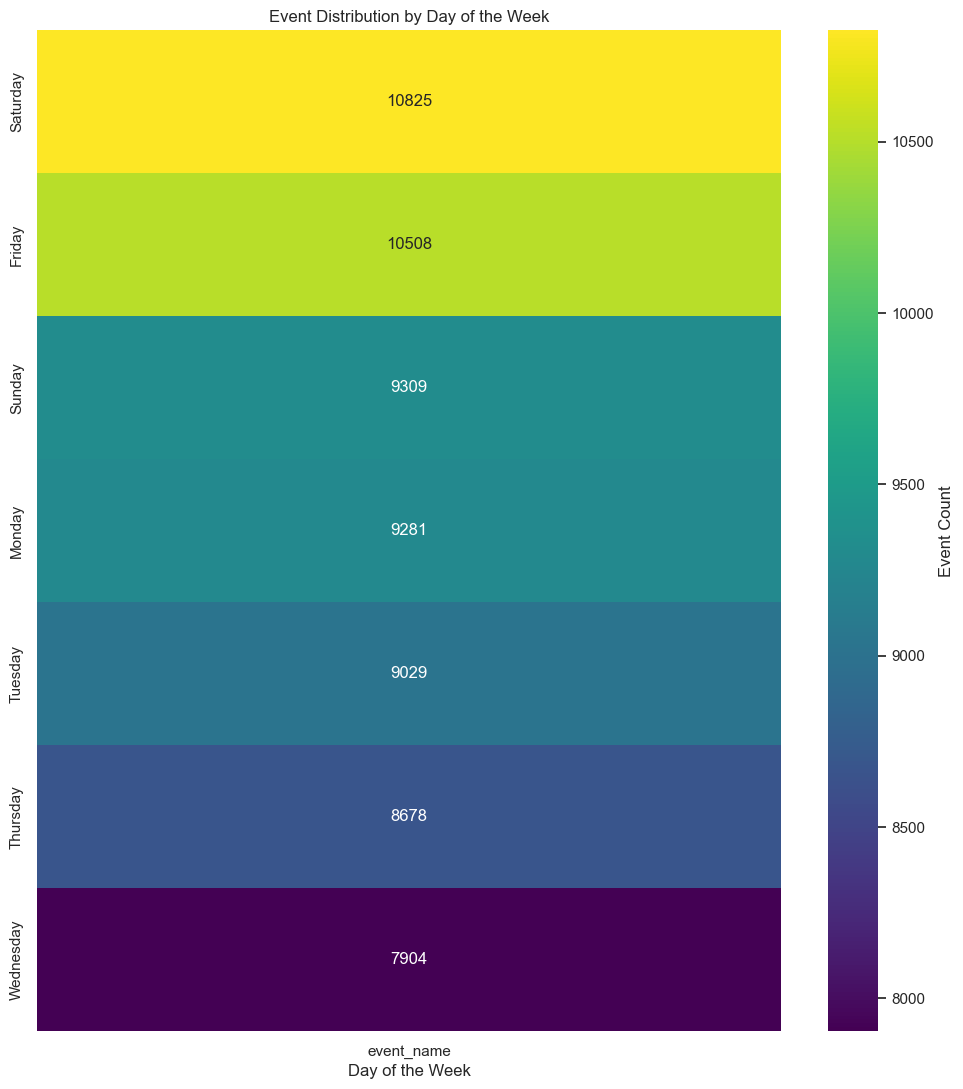

In [62]:
# Convert 'timestamp' to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Extract the day of the week
df['day_of_week'] = df['timestamp'].dt.day_name()

# Create a pivot table
pivot_table = pd.pivot_table(df, values='event_name', index='day_of_week', aggfunc='count', fill_value=0)

# Reorder the days of the week in descending order of event counts
day_order = pivot_table.sum(axis=1).sort_values(ascending=False).index
pivot_table = pivot_table.reindex(day_order)

# Create a heatmap
plt.figure(figsize=(12, 13))
sns.heatmap(pivot_table, cmap='viridis', annot=True, fmt='d', cbar_kws={'label': 'Event Count'})
plt.title('Event Distribution by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('')
plt.show()


#### <b><span style='color:#FF0000'> NOTE :</span></b>

**1)Saturday & Friday are the days with the highest event counts registering 10,825 and 10,508 events respectively**\
**2)Wednesday sees the lowest activity with only 7,904 event.**\
**3)A trend is observed where there is a gradual decrease in the event count from Saturday towards Wednesday.**\

**In summary, peak user activity is experienced during the weekend, especially on Friday & Saturday, while Wednesday is the least active day.**




## <b>3.7 <span style='color:#ff5277'> Coorelation study for traffic analysis</span></b>

In [65]:
# Extract hour and day of the week from the 'Time' column
df['Hour'] = df['Time'].str.split(':').str[0].astype(int)
df['Day_of_Week'] = pd.Categorical(df['day_of_week'], categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)

# Create a pivot table for user activity by hour and day of the week
heatmap_data = df.pivot_table(index='Hour', columns='Day_of_Week', values='device_id', aggfunc='count', fill_value=0)

# Create the heatmap using Plotly
fig = px.imshow(heatmap_data, x=heatmap_data.columns, y=heatmap_data.index, color_continuous_scale='Viridis')

# Customize the heatmap appearance
fig.update_layout(
    title='User Activity Heatmap by Hour and Day of the Week',
    xaxis_title='Day of the Week',
    yaxis_title='Hour of the Day',
    xaxis_nticks=len(heatmap_data.columns),
    yaxis_nticks=len(heatmap_data.index),
)

# Show the heatmap
fig.show()

#### <b><span style='color:#FF0000'> NOTE :</span></b>

**The heatmap offers insights into when users are mostly active during the week. There's a clear mid-day peak on weekdays and more uniform activity during weekends wth early mornings consistently being the least active periods.**

<a id="4"></a>
<p style="background-color:#ff5277;font-family:newtimeroman;color:#FFF9ED;font-size:120%;text-align:center;border-radius:10px 10px;"> Conclusion</p>

<span style='color:#ff9a17'>**Recommendations:**

**From the about visual study the following are the recommendations that I would be putting forwards to the Product Manager to help make data driven decison.**

<span style='color:#ff9a17'>**Address Typing Issues:**

- **The drop in percentages from 'pickup_shown' to 'pickup_address_typed' and similarly for 'dropoff' suggests users might be experiencing difficulties or inefficiencies in manually inputting addresses.**
    - <span style='color:#ff5277'>- **Suggestion to enhancing address auto-suggestions or integrating a more intuitive map-based selection.**</span></b>

<span style='color:#ff9a17'>**Payment Flow Optimization:**

- **The significant percentage drop from 'payments_shown' to 'payments_selected' highlights potential friction in the payment selection process.**
    - <span style='color:#ff5277'>- **Suggestion to simplify the process, provide clearer payment method descriptions, or consider offering popular local payment methods.**

<span style='color:#ff9a17'>**Promotions During Peak Hours:**

- **Minute-level analysis showed fluctuating activity throughout the day with some identifiable peaks.** 
    - <span style='color:#ff5277'>- **Suggestion to target the identifiable peaks with promotions or discounts to encourage Preorders.**

<span style='color:#ff9a17'>**Weekend Engagement:**

- **Given that Friday and Saturday see the highest user activity.**
    - <span style='color:#ff5277'> - **Suggestion to consider special weekend promotions or loyalty rewards to maximize conversions during these peak days.**

<span style='color:#ff9a17'>**Ride Ordering Streamlining:**

- **The final stage, 'ride_order_tapped', doesn’t reach the percentage levels of earlier stages like 'pickup_confirmed'.** 
   - <span style='color:#ff5277'>- **Suggestion to investigate if there are any last-minute concerns or frictions preventing users from confirming their rides.**

<span style='color:#ff9a17'>**Event Distribution Focus:**

- **The highest events occur on Friday and Saturday. While it's essential to cater to user needs on these days, don't neglect the other days, especially Wednesday, which has the lowest event count.** 
    - <span style='color:#ff5277'> - **Strategies could include mid-week discounts or incentives to boost user engagement during quieter periods.**


**In summary, optimizing address inputting, payment flows, and ride order confirmation can significantly improve the Preorder funnel's efficiency. Simultaneously, aligning promotions and support with user activity patterns can ensure a smoother and more engaging user experience. Therefore, the product manager could look into above shared suggetions to create strategies to build well tested products to improve user experince with the preorder and build ancillary product to increase revenue streams**

